In [1]:
!pip install transformers
!pip install arabert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 105.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 87.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 19.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186458 sha256=2d8b8dfab260794d28daa7144f0e5288211d969afe2d474324c4c6562dfe7fd8
  Stored in directory: /root/.cache/pip/wheels/10/

Some weights of the model checkpoint at aubmindlab/bert-base-arabertv02 were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


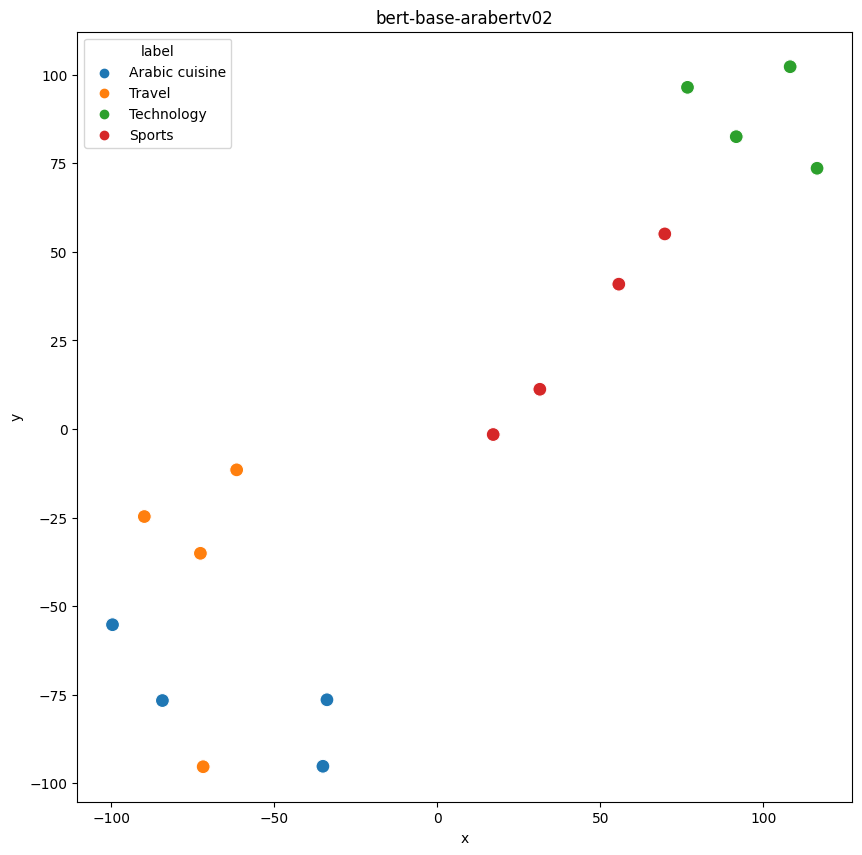

In [3]:
#Load the pre-trained BERT model
from transformers import AutoTokenizer, AutoModel
import torch
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tokenizer = AutoTokenizer.from_pretrained('aubmindlab/bert-base-arabertv02')
model = AutoModel.from_pretrained('aubmindlab/bert-base-arabertv02')

# Tokenize the input texts
data = ["أحب الأكلات العربية التقليدية مثل المنسف والكبسة والحمص والفلافل",
        "يتميز المطبخ العربي بالأطباق الغنية بالنكهات والتوابل المميزة",
        "أحب الطعام الحار، فأضيف الفلفل الحار إلى جميع الأطباق التي أقوم بإعدادها",
        "لا يمكن لأي شخص زيارة دولة عربية دون تجربة الشاورما اللذيذة",
        "أحلم بزيارة الأهرامات في مصر واستكشاف حضارة الفراعنة القديمة",
        "تعتبر باريس مدينة الأنوار الرومانسية الأكثر جاذبية في العالم",
        "يجب على كل شخص زيارة مدينة دبي للاستمتاع بالمناظر الخلابة والتسوق والترفيه",
        "تعد البحرين وجهة مثالية للسفر للحصول على تجربة فريدة من نوعها من الثقافة الخليجية",
        "الذكاء الاصطناعي هو مفهوم يتمثل في إعطاء الكمبيوترات والآلات القدرة على التعلم والتفكير بطريقة مستقلة",
        "يمكن للتكنولوجيا الحديثة أن تحسن الحياة اليومية للناس، مثل التواصل الاجتماعي والتطبيقات الطبية والتجارة الإلكترونية",
        "تتطور التكنولوجيا بسرعة كبيرة ويتم تطوير تقنيات جديدة باستمرار، مثل الواقع الافتراضي والواقع المعزز",
        "يعتبر الإنترنت أحد أهم الابتكارات التي تغيرت على نطاق واسع كيفية التواصل والتسوق والعمل",
        "يحظى كرة القدم بشعبية كبيرة فيالعالم العربي ويتم تنظيم بطولات كبيرة مثل كأس العالم وكأس آسيا",
        "يمارس العديد من الأشخاص في العالم العربي رياضة الجري والمشي للحفاظ على صحتهم وللتخلص من التوتر",
        "يعتبر الكرة الطائرة رياضة شعبية في بعض الدول العربية ويتم تنظيم بطولات كبيرة مثل بطولة العالَم للكرة الطائرة",
        "يتمتع العديد من الأشخاص في العالم العربي بالتزلج على الجليد ويتم تنظيم بطولات كبيرة مثل بطولة العالم للتزلج على الجليد"]
labels = ["Arabic cuisine", "Arabic cuisine", "Arabic cuisine", "Arabic cuisine", "Travel", "Travel", "Travel", "Travel", "Technology", "Technology", "Technology", "Technology", "Sports", "Sports", "Sports", "Sports"]

# Tokenize the input texts
encoded_data = tokenizer(data, padding=True, truncation=True, return_tensors='pt')

# Apply the BERT model to get the embeddings
with torch.no_grad():
    model_output = model(**encoded_data)

embeddings = model_output.last_hidden_state[:, 0, :].numpy()

# Apply t-SNE to reduce the dimensionality of the embeddings
tsne_embeddings = TSNE(n_components=2, perplexity=5, random_state=42).fit_transform(embeddings)

# Visualize the embeddings
df = pd.DataFrame(tsne_embeddings, columns=['x', 'y'])
df['label'] = labels

plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='x', y='y', hue='label', s=100)
plt.title("bert-base-arabertv02")
plt.show()

This model is specifically designed for handling Arabic text and includes additional features such as diacritic restoration and normalization
which can be beneficial for text classification tasks involving Arabic text
So, its better than other models (bert-base-multilingual-cased and asafaya/bert-base-arabic)